In [26]:
import os

kaggle_dir = '/root/.kaggle'
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
    print(f"Created directory: {kaggle_dir}")
else:
    print(f"Directory already exists: {kaggle_dir}")

Directory already exists: /root/.kaggle


In [27]:
import os
import json

kaggle_json_path = '/root/.kaggle/kaggle.json'

if not os.path.exists(kaggle_json_path):
    print(f"'{kaggle_json_path}' does not exist.")
    print("Please upload your 'kaggle.json' file to the '/root/.kaggle/' directory.")
    print("You can download it from your Kaggle account settings: Profile -> Account -> Create New API Token.")
    print("After uploading, make sure to rerun this cell to verify its content.")
else:
    print(f"'{kaggle_json_path}' already exists. Verifying its content:")
    try:
        with open(kaggle_json_path, 'r') as f:
            kaggle_config = json.load(f)
        print(json.dumps(kaggle_config, indent=2))
        if kaggle_config.get('username') == 'your_kaggle_username' or kaggle_config.get('key') == 'your_kaggle_api_key':
            print("\nWarning: Your 'kaggle.json' file appears to contain placeholder credentials.")
            print("Please ensure you update 'username' and 'key' with your actual Kaggle credentials.")
        print("\nNext, file permissions will be set.")
    except json.JSONDecodeError:
        print(f"Error: '{kaggle_json_path}' is not a valid JSON file. Please fix or re-upload it.")
        print("You can download it from your Kaggle account settings: Profile -> Account -> Create New API Token.")

'/root/.kaggle/kaggle.json' already exists. Verifying its content:
{
  "username": "your_kaggle_username",
  "key": "your_kaggle_api_key"
}

Please ensure you update 'username' and 'key' with your actual Kaggle credentials.

Next, file permissions will be set.


In [28]:
import os

kaggle_json_path = '/root/.kaggle/kaggle.json'

if os.path.exists(kaggle_json_path):
    # Set read/write permissions for the owner only (0o600)
    os.chmod(kaggle_json_path, 0o600)
    print(f"Permissions for '{kaggle_json_path}' set to 0o600.")
    print("Kaggle API key is now configured correctly.")
else:
    print(f"Warning: '{kaggle_json_path}' not found. Cannot set permissions.")
    print("Please ensure 'kaggle.json' is uploaded as instructed previously.")

Permissions for '/root/.kaggle/kaggle.json' set to 0o600.
Kaggle API key is now configured correctly.


In [29]:
import os

# Define the dataset name and the target download path
dataset_name = 'drgari/rock-paper-scissors'
download_path = './rps-dataset'

# Create the download directory if it doesn't exist
if not os.path.exists(download_path):
    os.makedirs(download_path)
    print(f"Created directory: {download_path}")

# Download the dataset using Kaggle CLI
# The -d flag specifies the dataset, -p specifies the path
!kaggle datasets download -d {dataset_name} -p {download_path}

print(f"Dataset '{dataset_name}' downloaded to '{download_path}'.")

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/drgari/rock-paper-scissors
Dataset 'drgari/rock-paper-scissors' downloaded to './rps-dataset'.


In [30]:
import os

# Define the correct dataset name and the target download path
dataset_name = 'drgfreeman/rockpaperscissors'
download_path = './rps-dataset'

# Create the download directory if it doesn't exist
if not os.path.exists(download_path):
    os.makedirs(download_path)
    print(f"Created directory: {download_path}")

# Download the dataset using Kaggle CLI
# The -d flag specifies the dataset, -p specifies the path
print(f"Attempting to download dataset '{dataset_name}' to '{download_path}'...")
!kaggle datasets download -d {dataset_name} -p {download_path}

# Check if the download was successful by looking for the zip file
# The zip file name is usually the last part of the dataset identifier, with hyphens instead of slashes
expected_zip_file_name = dataset_name.split('/')[-1] + '.zip'
expected_zip_file_path = os.path.join(download_path, expected_zip_file_name)

if os.path.exists(expected_zip_file_path):
    print(f"Successfully downloaded '{expected_zip_file_name}' to '{download_path}'.")
else:
    print(f"Download of '{expected_zip_file_name}' to '{download_path}' might have failed or the file name is different. Please check the output above.")


Attempting to download dataset 'drgfreeman/rockpaperscissors' to './rps-dataset'...
Dataset URL: https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors
License(s): CC-BY-SA-4.0
 90% 274M/306M [00:00<00:00, 652MB/s] 
100% 306M/306M [00:00<00:00, 681MB/s]
Successfully downloaded 'rockpaperscissors.zip' to './rps-dataset'.


In [31]:
import zipfile
import os

# Define the path to the downloaded zip file and the extraction path
# Based on previous output, the downloaded zip file is 'rockpaperscissors.zip' inside './rps-dataset'
zip_file_path = os.path.join(download_path, expected_zip_file_name)
extract_path = './rps-extracted'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)
    print(f"Created directory for extraction: {extract_path}")
else:
    print(f"Extraction directory already exists: {extract_path}")

# Extract the zip file
if os.path.exists(zip_file_path):
    print(f"Extracting '{zip_file_path}' to '{extract_path}'...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extraction complete.")
    # Optionally, verify some content
    print(f"Contents of '{extract_path}' after extraction: {os.listdir(extract_path)}")
else:
    print(f"Error: Zip file not found at '{zip_file_path}'. Please ensure it was downloaded correctly.")

Extraction directory already exists: ./rps-extracted
Extracting './rps-dataset/rockpaperscissors.zip' to './rps-extracted'...
Extraction complete.
Contents of './rps-extracted' after extraction: ['scissors', 'README_rpc-cv-images.txt', 'rps-cv-images', 'rock', 'paper']


In [32]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2. Define dataset paths and parameters:
DATASET_PATH = os.path.join(extract_path, 'rps-cv-images')
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
SEED = 42 # for reproducibility

TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.1
TEST_SPLIT = 0.1

CLASSES = ['rock', 'paper', 'scissors']

# Set random seed for reproducibility
random.seed(SEED)

print(f"Dataset path: {DATASET_PATH}")
print(f"Image size: {IMAGE_SIZE}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Classes: {CLASSES}")
print("Libraries imported and parameters defined.")

Dataset path: ./rps-extracted/rps-cv-images
Image size: (150, 150)
Batch size: 32
Classes: ['rock', 'paper', 'scissors']
Libraries imported and parameters defined.


In [33]:
import os
import shutil

# 3. Prepare directory structure for splits:
split_data_dir = './rps-split-data'

# Define paths for train, validation, and test directories
train_dir = os.path.join(split_data_dir, 'train')
validation_dir = os.path.join(split_data_dir, 'validation')
test_dir = os.path.join(split_data_dir, 'test')

# List of all directories to create
all_split_dirs = [train_dir, validation_dir, test_dir]
for base_dir in all_split_dirs:
    for class_name in CLASSES:
        path = os.path.join(base_dir, class_name)
        if os.path.exists(path):
            shutil.rmtree(path) # Remove existing content to prevent duplication
            print(f"Removed existing directory: {path}")
        os.makedirs(path)
        print(f"Created directory: {path}")

print("Directory structure for data splits created.")

Created directory: ./rps-split-data/train/rock
Created directory: ./rps-split-data/train/paper
Created directory: ./rps-split-data/train/scissors
Created directory: ./rps-split-data/validation/rock
Created directory: ./rps-split-data/validation/paper
Created directory: ./rps-split-data/validation/scissors
Created directory: ./rps-split-data/test/rock
Created directory: ./rps-split-data/test/paper
Created directory: ./rps-split-data/test/scissors
Directory structure for data splits created.


In [34]:
import os
import shutil
from sklearn.model_selection import train_test_split

# 4. Split and copy images:
print("Splitting and copying images...")

for class_name in CLASSES:
    source_class_dir = os.path.join(DATASET_PATH, class_name)
    images = [os.path.join(source_class_dir, f) for f in os.listdir(source_class_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    random.shuffle(images) # Shuffle images to ensure randomness before splitting

    # Split into training and (validation + test) sets
    train_images, val_test_images = train_test_split(images, train_size=TRAIN_SPLIT, random_state=SEED)

    # Calculate the ratio for splitting validation and test from val_test_images
    # val_split / (val_split + test_split) = 0.1 / (0.1 + 0.1) = 0.5
    val_images, test_images = train_test_split(val_test_images, train_size=(VAL_SPLIT / (VAL_SPLIT + TEST_SPLIT)), random_state=SEED)

    print(f"Class: {class_name}")
    print(f"  Total images: {len(images)}")
    print(f"  Training images: {len(train_images)}")
    print(f"  Validation images: {len(val_images)}")
    print(f"  Test images: {len(test_images)}")

    # Copy images to their respective directories
    for img_path in train_images:
        shutil.copy(img_path, os.path.join(train_dir, class_name, os.path.basename(img_path)))
    for img_path in val_images:
        shutil.copy(img_path, os.path.join(validation_dir, class_name, os.path.basename(img_path)))
    for img_path in test_images:
        shutil.copy(img_path, os.path.join(test_dir, class_name, os.path.basename(img_path)))

print("Image splitting and copying complete.")


Splitting and copying images...
Class: rock
  Total images: 726
  Training images: 580
  Validation images: 73
  Test images: 73
Class: paper
  Total images: 712
  Training images: 569
  Validation images: 71
  Test images: 72
Class: scissors
  Total images: 750
  Training images: 600
  Validation images: 75
  Test images: 75
Image splitting and copying complete.


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 5. Initialize ImageDataGenerators:

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and Test data generators (only rescaling, no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print("ImageDataGenerators initialized.")


ImageDataGenerators initialized.


In [36]:
import os

# 6. Create data generators:

print("Creating data generators...")

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed=SEED
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed=SEED
)

print("Data generators created.")


Creating data generators...
Found 1749 images belonging to 3 classes.
Found 219 images belonging to 3 classes.
Found 220 images belonging to 3 classes.
Data generators created.


In [37]:
print("\n--- Generator Information ---")
print(f"Train Generator: Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.")
print(f"  Class indices: {train_generator.class_indices}")

print(f"Validation Generator: Found {validation_generator.samples} images belonging to {validation_generator.num_classes} classes.")
print(f"  Class indices: {validation_generator.class_indices}")

print(f"Test Generator: Found {test_generator.samples} images belonging to {test_generator.num_classes} classes.")
print(f"  Class indices: {test_generator.class_indices}")

print("Data loading and preprocessing complete.")


--- Generator Information ---
Train Generator: Found 1749 images belonging to 3 classes.
  Class indices: {'paper': 0, 'rock': 1, 'scissors': 2}
Validation Generator: Found 219 images belonging to 3 classes.
  Class indices: {'paper': 0, 'rock': 1, 'scissors': 2}
Test Generator: Found 220 images belonging to 3 classes.
  Class indices: {'paper': 0, 'rock': 1, 'scissors': 2}
Data loading and preprocessing complete.


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

print("Defining CNN model architecture...")

# Initialize the Sequential model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(2, 2),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the 2D feature maps to 1D vector
    Flatten(),

    # Dense layers
    Dropout(0.5), # Dropout for regularization
    Dense(512, activation='relu'),
    Dense(len(CLASSES), activation='softmax') # Output layer with 3 units for 3 classes and softmax activation
])

# Print the model summary to review the architecture
print("Model architecture defined. Summary:")
model.summary()


Defining CNN model architecture...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model architecture defined. Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Input

print("Defining CNN model architecture...")

# Initialize the Sequential model
model = Sequential([
    Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)), # Explicit Input layer to avoid UserWarning
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the 2D feature maps to 1D vector
    Flatten(),

    # Dense layers
    Dropout(0.5), # Dropout for regularization
    Dense(512, activation='relu'),
    Dense(len(CLASSES), activation='softmax') # Output layer with 3 units for 3 classes and softmax activation
])

# Print the model summary to review the architecture
print("Model architecture defined. Summary:")
model.summary()


Defining CNN model architecture...
Model architecture defined. Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
from tensorflow.keras.optimizers import Adam

# 1. Define number of epochs
EPOCHS = 15
print(f"Number of epochs set to: {EPOCHS}")

# 2. Compile the model
print("Compiling model...")
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("Model compiled successfully.")

Number of epochs set to: 15
Compiling model...
Model compiled successfully.


In [41]:
print("Training model...")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)
print("Model training complete.")

Training model...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.3654 - loss: 1.3676 - val_accuracy: 0.4115 - val_loss: 1.0242
Epoch 2/15
 1/54 ━━━━━━━━━━━━━━━━━━━━ 1:24 2s/step - accuracy: 0.3438 - loss: 1.1318

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.3438 - loss: 1.1318 - val_accuracy: 0.4115 - val_loss: 1.0308
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.4568 - loss: 1.0235 - val_accuracy: 0.5990 - val_loss: 0.9322
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.5312 - loss: 0.9264 - val_accuracy: 0.5521 - val_loss: 0.9570
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.5616 - loss: 0.9364 - val_accuracy: 0.9115 - val_loss: 0.5135
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.7188 - loss: 0.6745 - val_accuracy: 0.8438 - val_loss: 0.5617
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.7831 - loss: 0.5801 - val_accuracy: 0.9740 - val_loss: 0.1386
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.9062 - loss: 0.3512 - val_accuracy: 0.9583 - val_loss: 0.1413
Epoch 9/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.8606 - loss: 0.3874 - val_accuracy: 0.9792 - val_loss: 0

In [42]:
## Evaluate CNN Model

In [43]:
print("Evaluating model on test data...")
loss, accuracy = model.evaluate(test_generator)

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print("Model evaluation complete.")

Evaluating model on test data...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 606ms/step - accuracy: 0.9875 - loss: 0.0376

Test Loss: 0.0311
Test Accuracy: 0.9909
Model evaluation complete.


Visualizing training history...


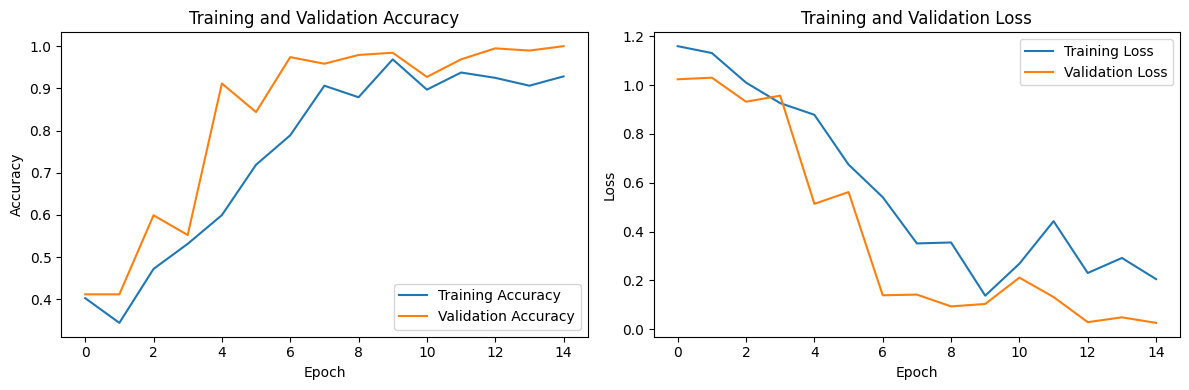

Training history visualization complete.


In [51]:
import matplotlib.pyplot as plt

print("Visualizing training history...")

# Get training and validation metrics from history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

print("Training history visualization complete.")

In [52]:
import numpy as np
from sklearn.metrics import classification_report

print("Calculating precision, recall, and F1-score...")

# Get true labels
y_true = test_generator.classes

# Predict probabilities for the test set
y_pred_prob = model.predict(test_generator)

# Convert probabilities to predicted class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate and print the classification report
report = classification_report(y_true, y_pred, target_names=CLASSES)
print("\nClassification Report:")
print(report)

print("Metrics calculation complete.")

Calculating precision, recall, and F1-score...
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 567ms/step

Classification Report:
              precision    recall  f1-score   support

        rock       0.99      0.99      0.99        72
       paper       0.99      1.00      0.99        73
    scissors       1.00      0.99      0.99        75

    accuracy                           0.99       220
   macro avg       0.99      0.99      0.99       220
weighted avg       0.99      0.99      0.99       220

Metrics calculation complete.
